#Equilibrium Plots

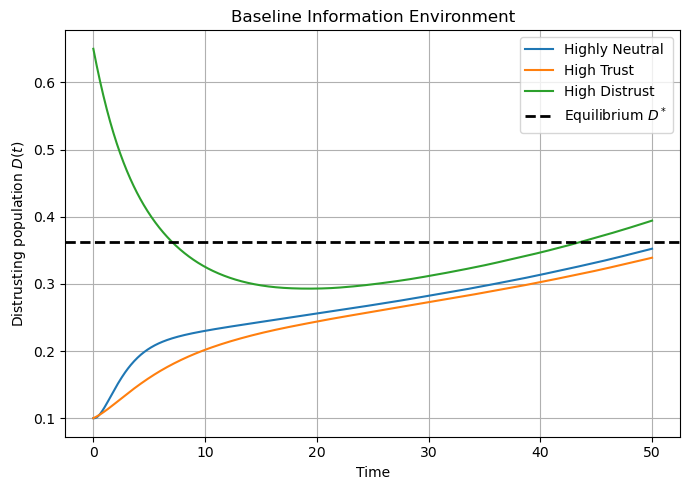

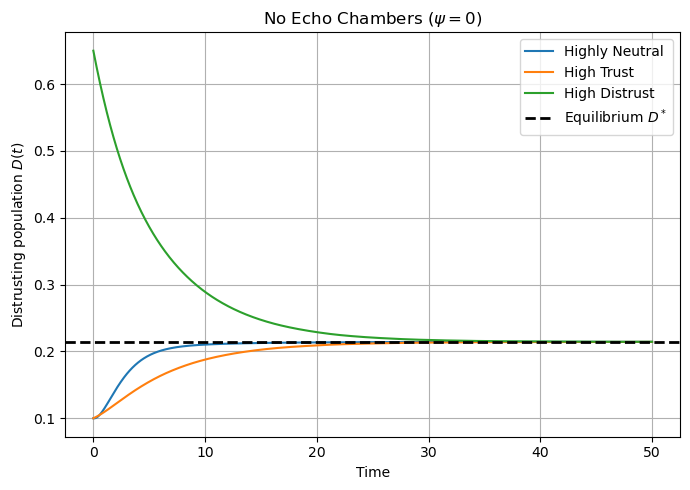

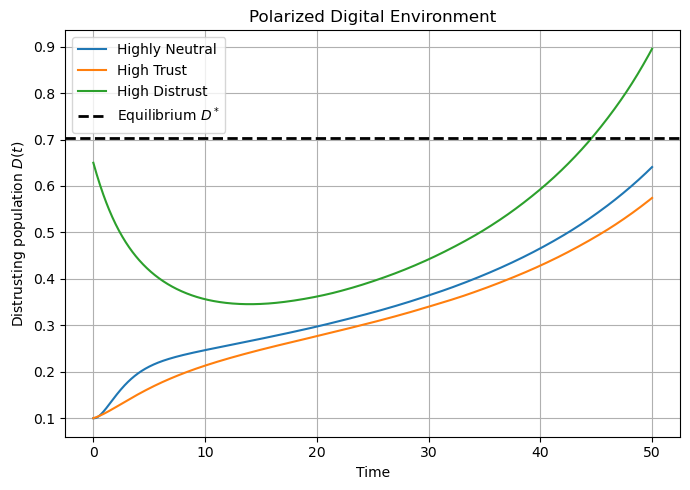

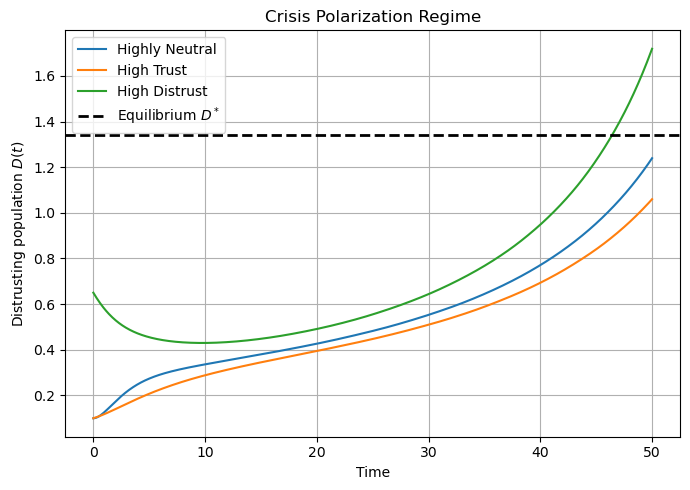

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -----------------------------
# Model definition
# -----------------------------
def trust_model(t, y, beta, sigma, alpha, delta, mu, psi, theta):
    S, E, T, D = y

    dSdt = -(beta + alpha) * S + delta * T + mu * D
    dEdt = beta * S + psi * D * S - sigma * E
    dTdt = (1 - theta) * sigma * E + alpha * S - delta * T
    dDdt = theta * sigma * E - mu * D

    return [dSdt, dEdt, dTdt, dDdt]

# -----------------------------
# Fixed baseline parameters
# -----------------------------
beta  = 0.4
sigma = 0.5
delta = 0.2
mu    = 0.15

# -----------------------------
# Time settings
# -----------------------------
t_span = (0, 50)
t_eval = np.linspace(0, 50, 1000)

# -----------------------------
# Initial conditions
# -----------------------------
initial_conditions = [
    ([0.7, 0.05, 0.15, 0.10], "Highly Neutral"),
    ([0.2, 0.10, 0.60, 0.10], "High Trust"),
    ([0.1, 0.05, 0.20, 0.65], "High Distrust")
]

# -----------------------------
# Parameter regimes (REVISED)
# -----------------------------
parameter_regimes = {
    "Baseline Information Environment": {
        "alpha": 0.30,
        "psi":   0.20,
        "theta": 0.45
    },
    "No Echo Chambers ($\\psi = 0$)": {
        "alpha": 0.30,
        "psi":   0.00,
        "theta": 0.45
    },
    "Polarized Digital Environment": {
        "alpha": 0.30,
        "psi":   0.35,
        "theta": 0.45
    },
    "Crisis Polarization Regime": {
        "alpha": 0.25,
        "psi":   0.30,
        "theta": 0.60
    }
}

# -----------------------------
# Run simulations and plot
# -----------------------------
for title, params in parameter_regimes.items():

    plt.figure(figsize=(7,5))
    final_D = []

    for y0, label in initial_conditions:
        sol = solve_ivp(
            trust_model,
            t_span,
            y0,
            args=(
                beta,
                sigma,
                params["alpha"],
                delta,
                mu,
                params["psi"],
                params["theta"]
            ),
            t_eval=t_eval
        )

        plt.plot(sol.t, sol.y[3], label=label)
        final_D.append(sol.y[3][-1])

    # Plot equilibrium level (numerical steady state)
    D_star = np.mean(final_D)
    plt.axhline(
        D_star,
        linestyle="--",
        linewidth=2,
        color="black",
        label=r"Equilibrium $D^*$"
    )

    plt.xlabel("Time")
    plt.ylabel("Distrusting population $D(t)$")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
